# Side Project: Superfast NLP, Sentiment Analysis and Topic Modelling

# Contents:

1) Sentiment Analysis with Vader Library  
2) Topic Modelling with LDA  
3) Custom predicitive analytics

In [1]:
# library imports
import requests
import time
import pandas as pd
import numpy as np
import ast
import re
from tqdm import tqdm

# preprocessing imports
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# modeling imports
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVR


#NLP imports
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_words=('well','need','option','also','let', 'new', 'nice','great', 'stop', 'go', 'get', 'good', 'want','make','keep','would')
for i in new_words:
    stop_words.append(i)


from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()



import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

At the end of the Community Survey, respondents are given the option to provide written comments in response to the following question: “If there was ONE thing you could share with the Mayor regarding the City of Austin (any comment, suggestion, etc.), what would it be?” To protect the respondent's identity, the open-ended comments are not linked to the closed-ended survey responses. While the results of the open-ended comments are not statistically valid, they provide useful insights into the community survey responses. The results are recorded verbatim, so spelling and grammatical errors have not been corrected. These comments are raw and unedited from the community. Some comments may not be suitable for younger audiences. Comments do not necessarily reflect the values or beliefs of the City of Austin.

In [2]:
df1 = pd.read_csv('open_end_survey.csv')

In [3]:
df1.head()

,Year,Council District,Comment,Date as of Date
0,2016,7,"Dissatisfied traffic and with traffic, timing ...",01/01/2016 12:00:00 AM
1,2016,9,Maintenance of city facilities needs to be equ...,01/01/2016 12:00:00 AM
2,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB...,01/01/2016 12:00:00 AM
3,2016,7,(1) City of Austin taxes are way too high espe...,01/01/2016 12:00:00 AM
4,2016,3,(1) For a city where flash floods are endemic ...,01/01/2016 12:00:00 AM


In [4]:
df1['Comment'][1]

'Maintenance of city facilities needs to be equitable across the city. We need to think long-term; Austin can\'t sustain it\'s current level of "chic" indefinitely. What are we going to do when the cool beautiful people move to a community with more shiny dime-store objects to lure them? Long after the current boom goes bust (and it always does) the rest of us real Austinites will still be here. It really is time to stop sacrificing the quality of life on the east side of town (or any of the  less-privileged parts of town) for the wants of those living in the wealthier areas. The differences from one neighborhood to the next are quite visible. Public transportation needs to be a primary issue, whether the numerous single-car drivers like it or not. In short, we need to find our way back to being both more humane and pragmatic.'

In [5]:
df1.tail()

,Year,Council District,Comment,Date as of Date
3182,2017,6,YOU MUST DO SOMETHING CONSTRUCTIVE TO DEAL WIT...,01/01/2017 12:00:00 AM
3183,2017,3,You need more housing options for felons. Ther...,01/01/2017 12:00:00 AM
3184,2017,2,You put bike lanes on streets where no one rid...,01/01/2017 12:00:00 AM
3185,2017,3,You to need to pay teachers better. This city...,01/01/2017 12:00:00 AM
3186,2017,7,"You will never make everyone happy, so do what...",01/01/2017 12:00:00 AM


In [6]:
df1.isnull().sum().sum()

0

In [7]:
df1.shape

(3187, 4)

In [8]:
df1.dropna(inplace = True)

# Sentiment Analysis

In [9]:
df1['scores'] = df1['Comment'].apply(lambda review: sid.polarity_scores(review))

df1.head()

,Year,Council District,Comment,Date as of Date,scores
0,2016,7,"Dissatisfied traffic and with traffic, timing ...",01/01/2016 12:00:00 AM,"{'neg': 0.202, 'neu': 0.646, 'pos': 0.152, 'co..."
1,2016,9,Maintenance of city facilities needs to be equ...,01/01/2016 12:00:00 AM,"{'neg': 0.014, 'neu': 0.909, 'pos': 0.077, 'co..."
2,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp..."
3,2016,7,(1) City of Austin taxes are way too high espe...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2016,3,(1) For a city where flash floods are endemic ...,01/01/2016 12:00:00 AM,"{'neg': 0.141, 'neu': 0.751, 'pos': 0.108, 'co..."


In [10]:
df1['compound']  = df1['scores'].apply(lambda score_dict: score_dict['compound'])

df1.head()

,Year,Council District,Comment,Date as of Date,scores,compound
0,2016,7,"Dissatisfied traffic and with traffic, timing ...",01/01/2016 12:00:00 AM,"{'neg': 0.202, 'neu': 0.646, 'pos': 0.152, 'co...",-0.5232
1,2016,9,Maintenance of city facilities needs to be equ...,01/01/2016 12:00:00 AM,"{'neg': 0.014, 'neu': 0.909, 'pos': 0.077, 'co...",0.8658
2,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404
3,2016,7,(1) City of Austin taxes are way too high espe...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,2016,3,(1) For a city where flash floods are endemic ...,01/01/2016 12:00:00 AM,"{'neg': 0.141, 'neu': 0.751, 'pos': 0.108, 'co...",-0.3384


In [11]:
df1['comp_score'] = df1['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df1.head()

,Year,Council District,Comment,Date as of Date,scores,compound,comp_score
0,2016,7,"Dissatisfied traffic and with traffic, timing ...",01/01/2016 12:00:00 AM,"{'neg': 0.202, 'neu': 0.646, 'pos': 0.152, 'co...",-0.5232,neg
1,2016,9,Maintenance of city facilities needs to be equ...,01/01/2016 12:00:00 AM,"{'neg': 0.014, 'neu': 0.909, 'pos': 0.077, 'co...",0.8658,pos
2,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404,pos
3,2016,7,(1) City of Austin taxes are way too high espe...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,2016,3,(1) For a city where flash floods are endemic ...,01/01/2016 12:00:00 AM,"{'neg': 0.141, 'neu': 0.751, 'pos': 0.108, 'co...",-0.3384,neg


In [12]:
df1['is_positive'] = df1['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

df1.head()

,Year,Council District,Comment,Date as of Date,scores,compound,comp_score,is_positive
0,2016,7,"Dissatisfied traffic and with traffic, timing ...",01/01/2016 12:00:00 AM,"{'neg': 0.202, 'neu': 0.646, 'pos': 0.152, 'co...",-0.5232,neg,0
1,2016,9,Maintenance of city facilities needs to be equ...,01/01/2016 12:00:00 AM,"{'neg': 0.014, 'neu': 0.909, 'pos': 0.077, 'co...",0.8658,pos,1
2,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.4404,pos,1
3,2016,7,(1) City of Austin taxes are way too high espe...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1
4,2016,3,(1) For a city where flash floods are endemic ...,01/01/2016 12:00:00 AM,"{'neg': 0.141, 'neu': 0.751, 'pos': 0.108, 'co...",-0.3384,neg,0


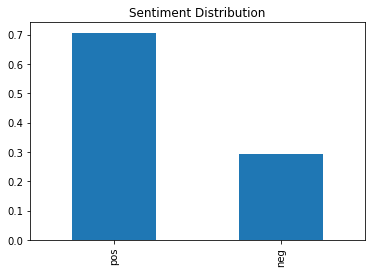

In [15]:
df1['comp_score'].value_counts(normalize = True).plot(kind = 'bar', title='Sentiment Distribution');


# Topic visualization

In [16]:
def sent_to_words(sentences):
    for x in sentences:
        x = re.sub("\'", "", x)  # remove single quotes
        x = gensim.utils.simple_preprocess(str(x), deacc=True) 
        yield(x)  

# Convert to list
data = df1['Comment'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['dissatisfied', 'traffic', 'and', 'with', 'traffic', 'timing', 'of', 'street', 'lights', 'extremely', 'dissatisfied', 'with', 'cit', 'govt', 'interfering', 'in', 'local', 'businesses', 'uber', 'lyft', 'income', 'property', 'owners', 'also', 'extremely', 'dissatisfied', 'with', 'all', 'the', 'free', 'handouts', 'to', 'people', 'who', 'are', 'perfectly', 'capable', 'of', 'earning', 'their', 'own', 'money', 'im', 'very', 'dissatisfied', 'with', 'the', 'liberal', 'leaning', 'local', 'politicians']]


In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

# code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           #random_state=42,
                                           update_every=1,
                                           chunksize=10,
                                           #passes=10,
                                           #alpha='asymmetric',
                                           #iterations=100,
                                           per_word_topics=True)
                                           

print(lda_model.print_topics())

[(0, '0.029*"traffic" + 0.021*"build" + 0.018*"improve" + 0.018*"water" + 0.017*"problem" + 0.017*"area" + 0.017*"homeless" + 0.016*"leave" + 0.013*"building" + 0.013*"drive"'), (1, '0.069*"city" + 0.029*"pay" + 0.029*"transportation" + 0.027*"downtown" + 0.024*"growth" + 0.020*"service" + 0.018*"plan" + 0.016*"business" + 0.015*"try" + 0.015*"highway"'), (2, '0.062*"traffic" + 0.035*"work" + 0.034*"people" + 0.031*"live" + 0.023*"road" + 0.020*"street" + 0.020*"many" + 0.013*"year" + 0.013*"home" + 0.013*"issue"'), (3, '0.048*"housing" + 0.038*"affordable" + 0.031*"city" + 0.023*"public" + 0.020*"high" + 0.018*"cost" + 0.017*"community" + 0.015*"neighborhood" + 0.014*"grow" + 0.012*"must"')]


In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4116,"traffic, work, people, live, road, street, man...","[dissatisfied, traffic, traffic, time, street,..."
1,1,3.0,0.4420,"housing, affordable, city, public, high, cost,...","[facility, equitable, city, think, sustain, cu..."
2,2,0.0,0.8641,"traffic, build, improve, water, problem, area,...","[improve, police, accountability, curb, entrif..."
3,3,3.0,0.5411,"housing, affordable, city, public, high, cost,...","[taxis, way, high, especially, require, law, h..."
4,4,0.0,0.4619,"traffic, build, improve, water, problem, area,...","[flood, endemic, sure, building, ground, scary..."
5,5,2.0,0.5013,"traffic, work, people, live, road, street, man...","[low, rent, cancel, several, use, work, includ..."
6,6,1.0,0.3356,"city, pay, transportation, downtown, growth, s...","[continue, fund, city, activity, cannon, expec..."
7,7,2.0,0.5585,"traffic, work, people, live, road, street, man...","[massive, road, expansion, much, traffic, low,..."
8,8,3.0,0.5322,"housing, affordable, city, public, high, cost,...","[traffic, congestion, utility, change, afforda..."
9,9,2.0,0.6250,"traffic, work, people, live, road, street, man...",[work]


In [20]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9476,"traffic, build, improve, water, problem, area, homeless, leave, building, drive","[provide, hour, notice, restaurant, inspection, enforce, watering, restriction, doable, fix, bui..."
1,1.0,0.9231,"city, pay, transportation, downtown, growth, service, plan, business, try, highway","[city, resident, local, business, priority, big, money, corporate, lobbyist]"
2,2.0,0.9329,"traffic, work, people, live, road, street, many, year, home, issue","[really, settle, interested, buying, home, concerned, potential, burden, address, affordability,..."
3,3.0,0.9111,"housing, affordable, city, public, high, cost, community, neighborhood, grow, must","[fact, long, crazy, council, member, look, crazy, ad]"


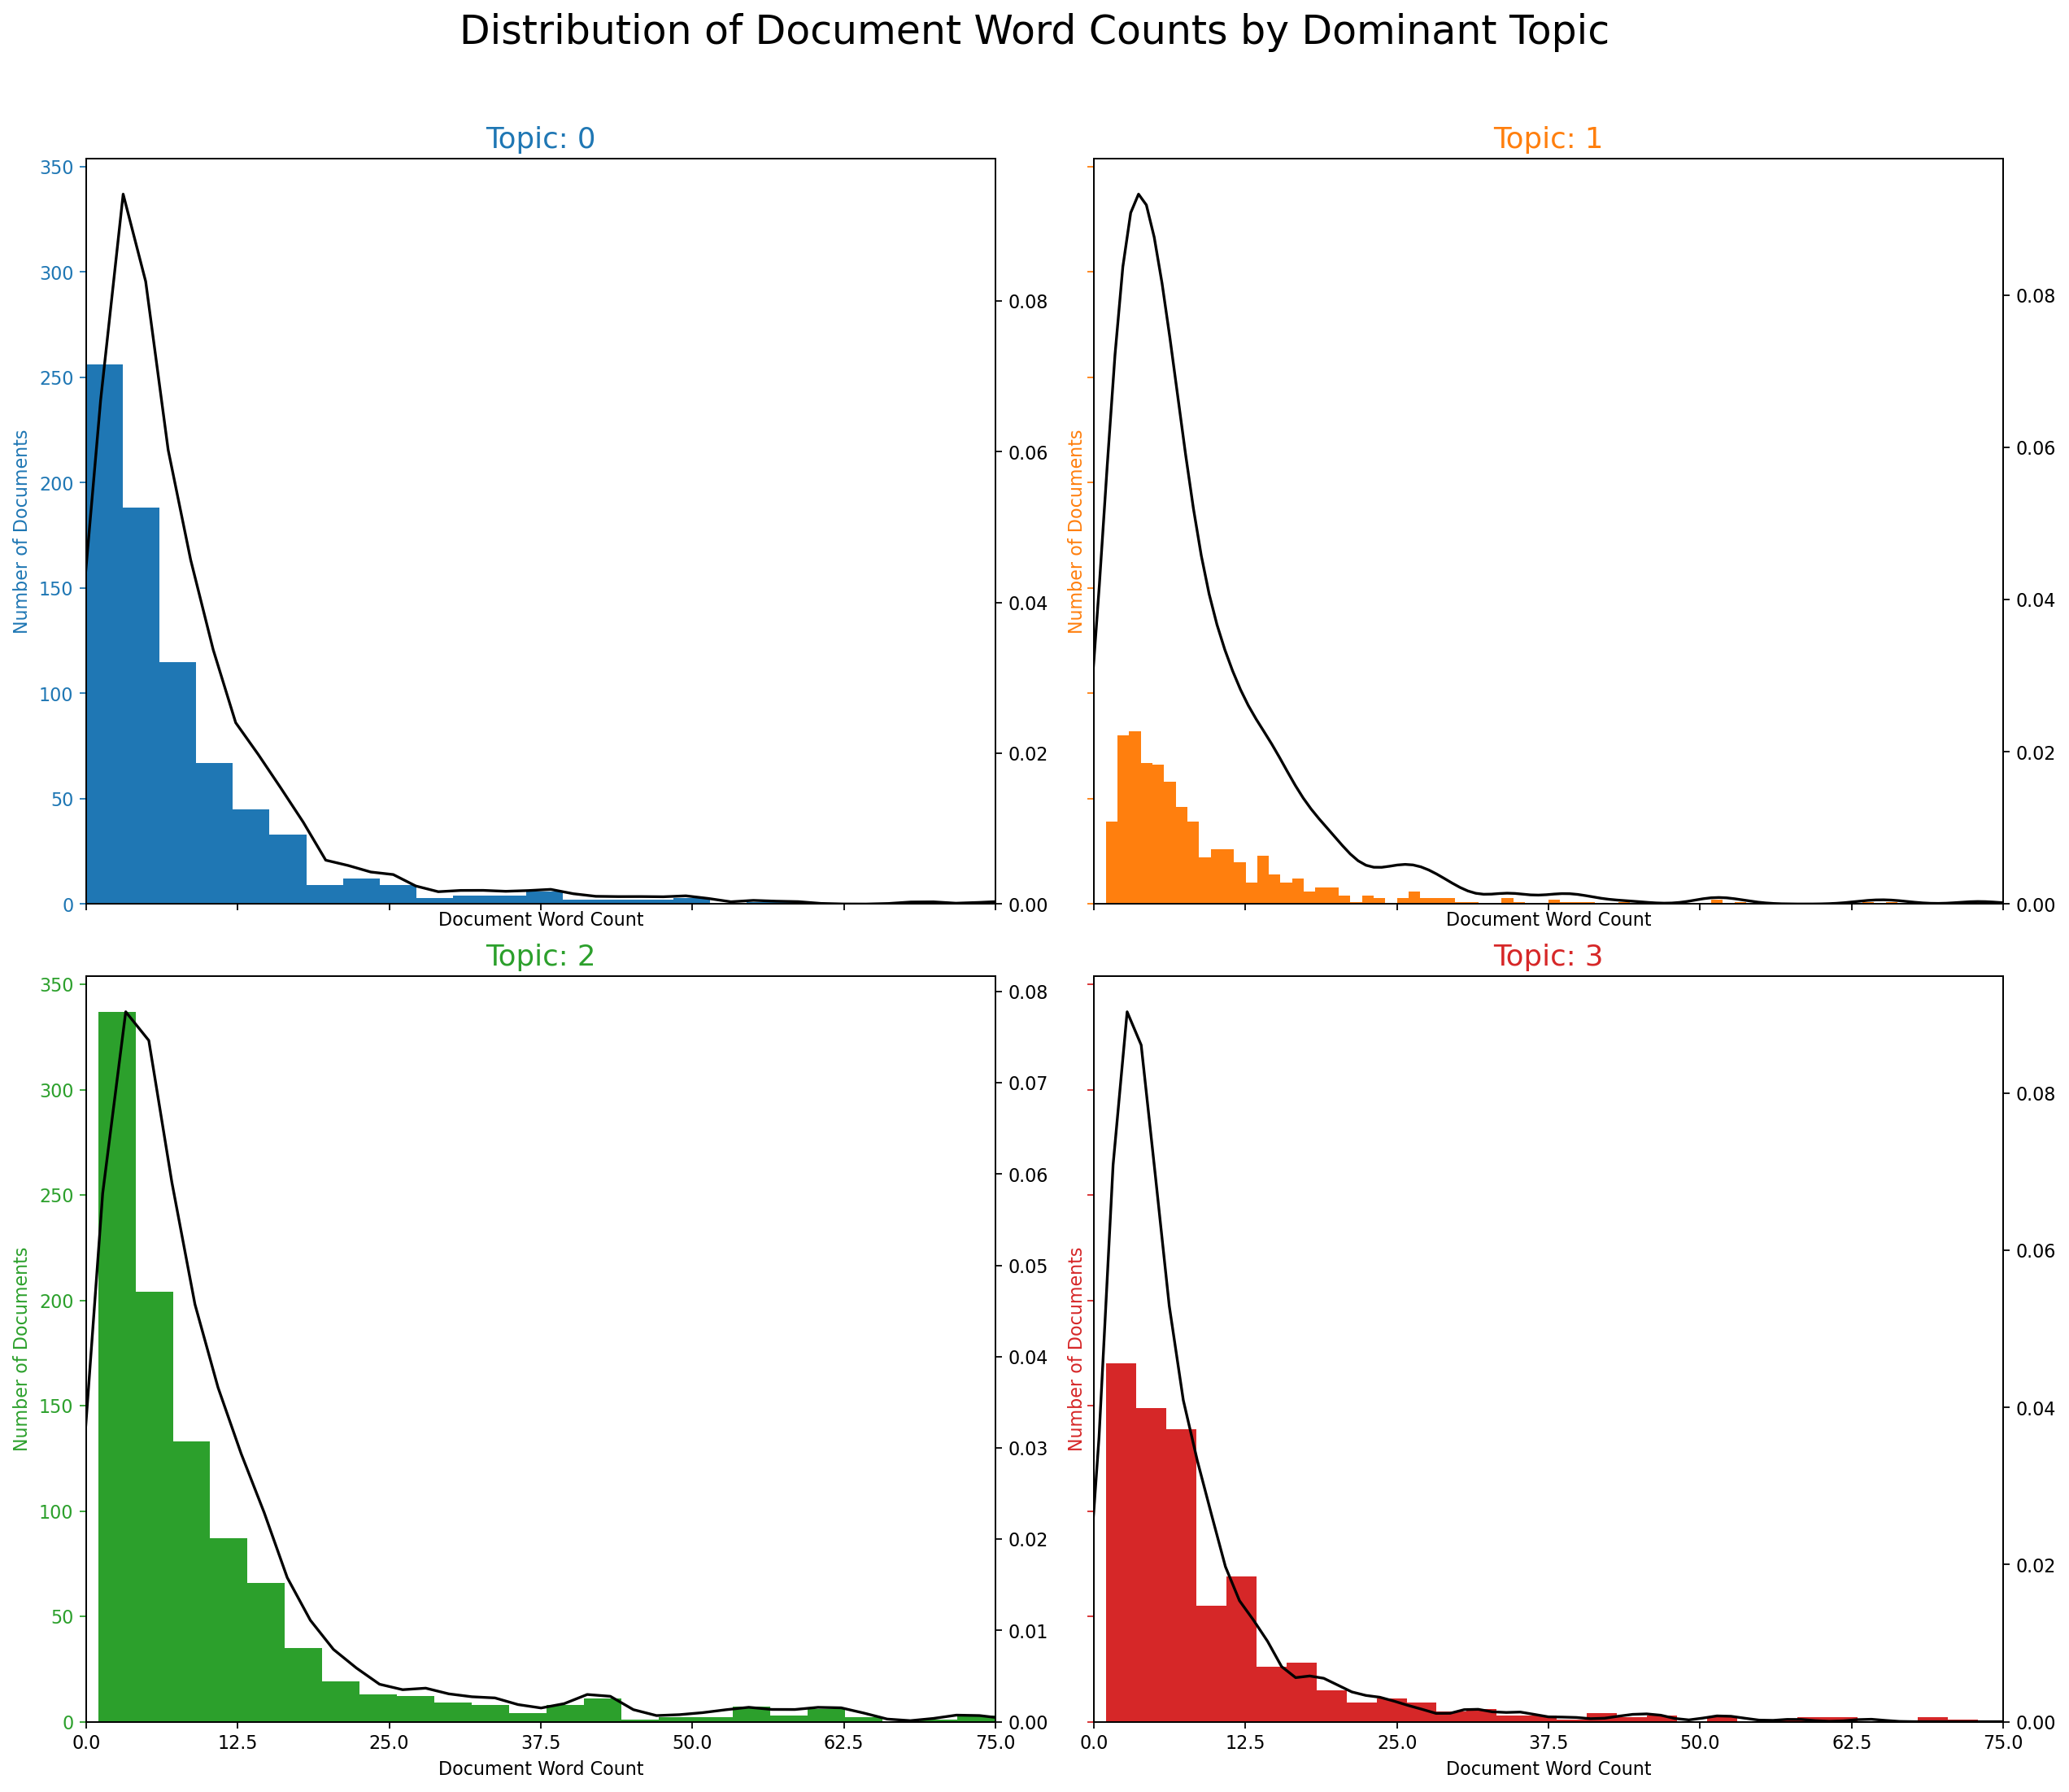

In [21]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14),dpi = 160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 75, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 75), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

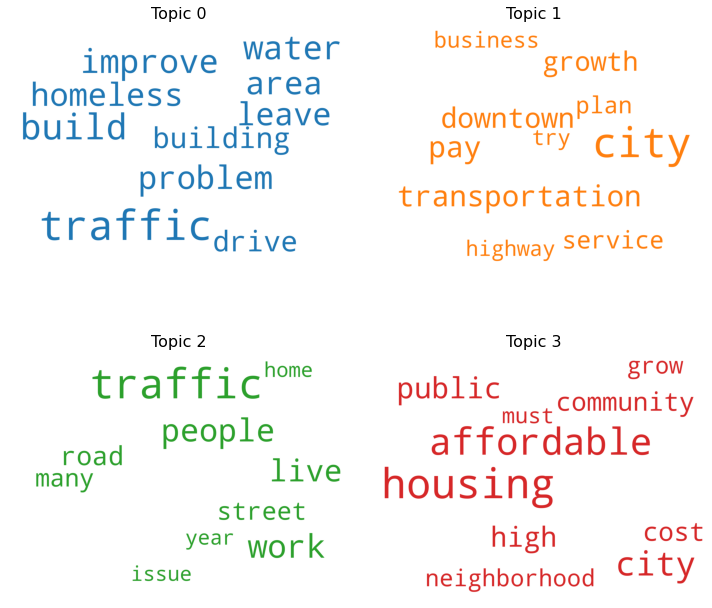

In [22]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

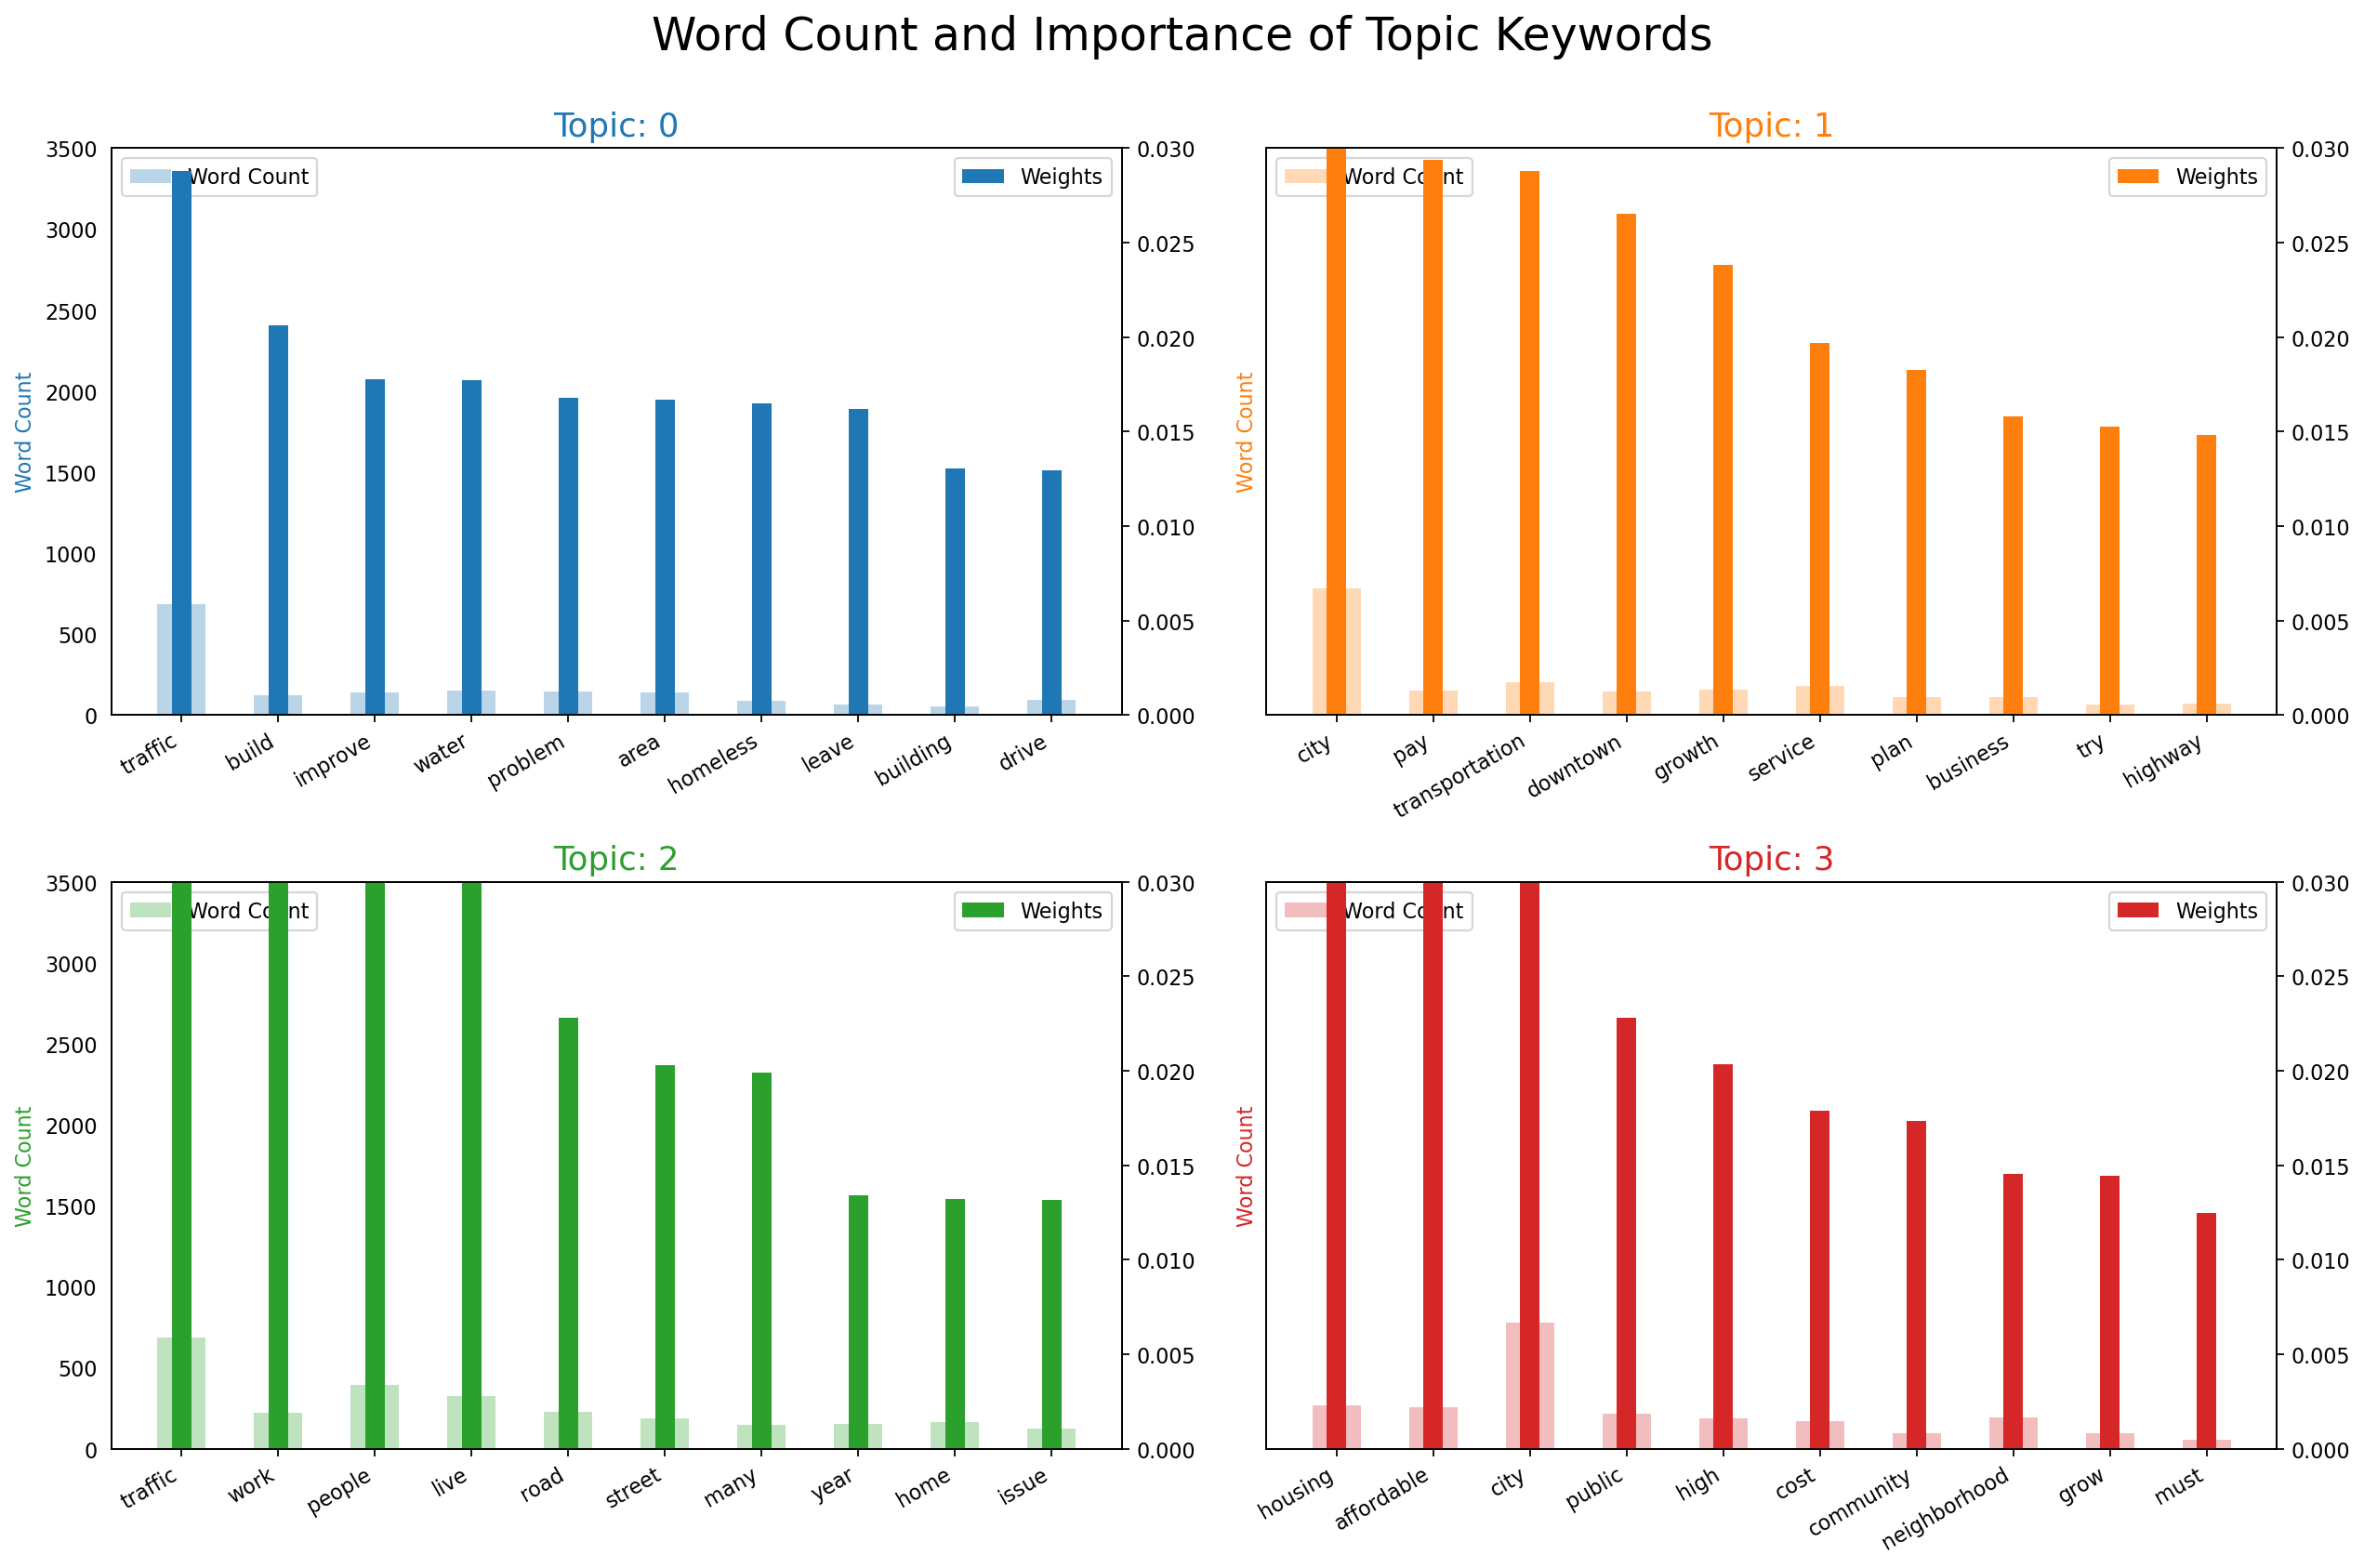

In [23]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [24]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

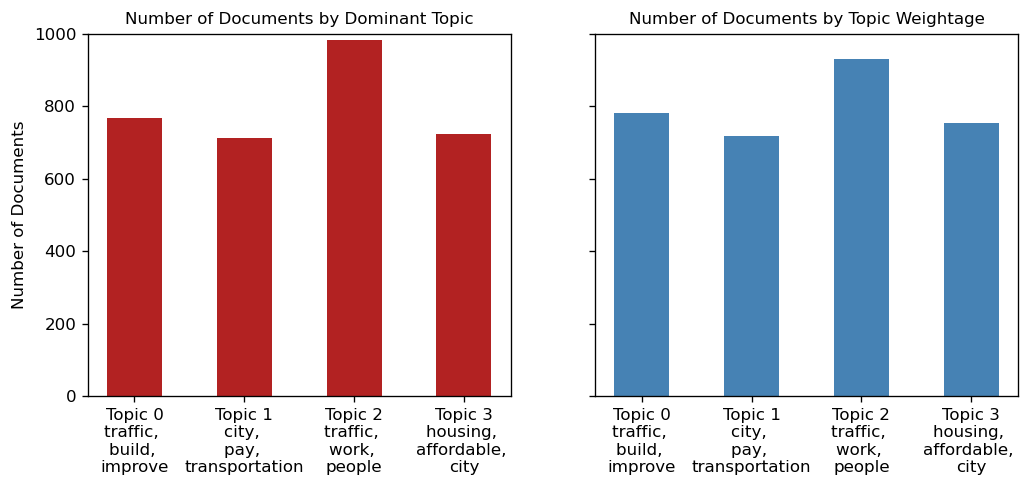

In [25]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [26]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2922 samples in 0.006s...
[t-SNE] Computed neighbors for 2922 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2922
[t-SNE] Computed conditional probabilities for sample 2000 / 2922
[t-SNE] Computed conditional probabilities for sample 2922 / 2922
[t-SNE] Mean sigma: 0.000079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.199001
[t-SNE] KL divergence after 1000 iterations: 0.607505


Loading BokehJS ...

In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.195222  0.155676       1        1  30.209097
0     -0.168033 -0.189654       2        1  24.263544
3      0.155249  0.161951       3        1  23.830383
1      0.208006 -0.127974       4        1  21.696970, topic_info=           Term        Freq       Total Category  logprob  loglift
32         city  705.000000  705.000000  Default  30.0000  30.0000
23      traffic  819.000000  819.000000  Default  29.0000  29.0000
162     housing  361.000000  361.000000  Default  28.0000  28.0000
128  affordable  289.000000  289.000000  Default  27.0000  27.0000
114        work  340.000000  340.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
741       serve   33.492146   34.305000   Topic4  -5.3252   1.5040
135   available   75.809891   80.194702   Topic4  -4.5083   1.4718
379        able   36.234299   37.368534   Topic4  -5.2465   1.4972
32         city  474.157318  705.343140   Topic4  -2.6749   1.1309
104        sure   43.005379   45.600956   Topic4  -5.0752   1.4694

[171 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
379       1  0.026760        able
379       4  0.963377        able
887       1  0.983186      access
128       3  0.996560  affordable
212       2  0.988798       allow
...     ...       ...         ...
77        3  0.986239         way
114       1  0.997630        work
547       1  0.829468        year
547       2  0.115740        year
547       3  0.051440        year

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [28]:
sentiment_df = pd.merge(df, df1, left_index=True, right_index=True)

In [29]:
sentiment_df.head()

,Document_Id,Dominant_Topic,Year,Council District,Comment,Date as of Date,scores,compound,comp_score,is_positive
0,0,2,2016,7,"Dissatisfied traffic and with traffic, timing of street lights. EXTREMELY dissatisfied with cit...",01/01/2016 12:00:00 AM,"{'neg': 0.202, 'neu': 0.646, 'pos': 0.152, 'compound': -0.5232}",-0.5232,neg,0
1,1,3,2016,9,Maintenance of city facilities needs to be equitable across the city. We need to think long-term...,01/01/2016 12:00:00 AM,"{'neg': 0.014, 'neu': 0.909, 'pos': 0.077, 'compound': 0.8658}",0.8658,pos,1
2,2,0,2016,1,NEED TO IMPROVE POLICE ACCOUNTABILITY AND CURB ENTRIFICATION,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}",0.4404,pos,1
3,3,3,2016,7,(1) City of Austin taxes are way too high especially property tax!! (2) Now that it is required ...,01/01/2016 12:00:00 AM,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1
4,4,0,2016,3,"(1) For a city where flash floods are endemic =, we're sure building over our ground at a scary ...",01/01/2016 12:00:00 AM,"{'neg': 0.141, 'neu': 0.751, 'pos': 0.108, 'compound': -0.3384}",-0.3384,neg,0


In [30]:
sentiment_df['Dominant_Topic'].unique()

array([2, 3, 0, 1])

In [31]:
sentiment_df.groupby('Dominant_Topic')['comp_score'].value_counts(normalize = True)

Dominant_Topic  comp_score
0               pos           0.661017
                neg           0.338983
1               pos           0.759831
                neg           0.240169
2               pos           0.683943
                neg           0.316057
3               pos           0.733057
                neg           0.266943
Name: comp_score, dtype: float64

# Visualization by Sentiment

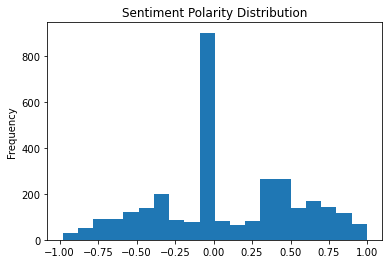

In [32]:
sentiment_df['compound'].plot(
    kind='hist',
    bins=20,
    title='Sentiment Polarity Distribution');

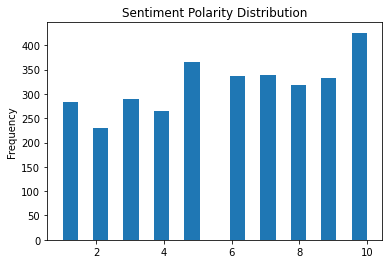

In [33]:
sentiment_df['Council District'].plot(
    kind='hist',
    bins=20,
    title='Sentiment Polarity Distribution');

In [40]:
sentiment_df = sentiment_df[sentiment_df['Dominant_Topic'] != 0]

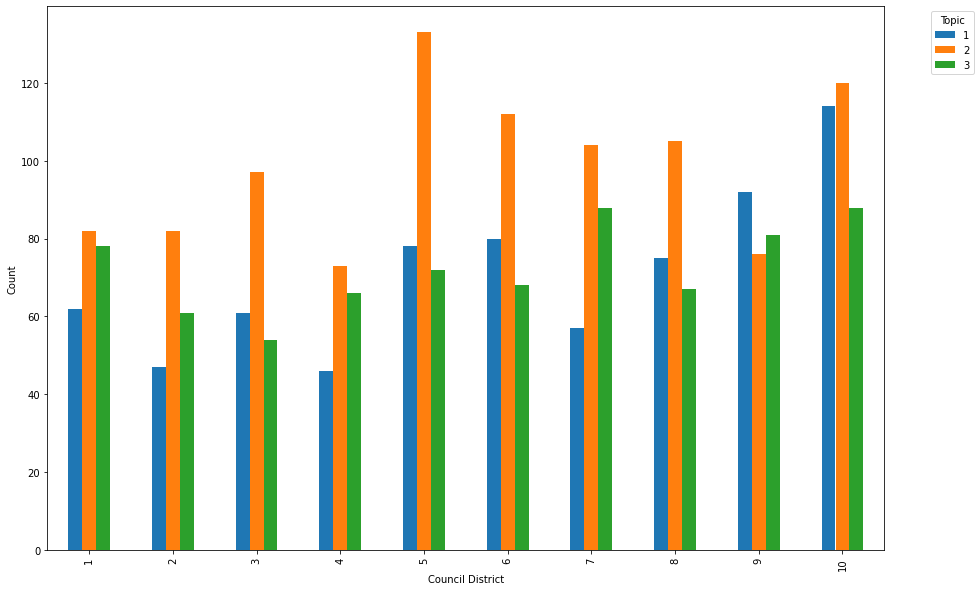

In [41]:
dfu = sentiment_df.groupby('Council District')['Dominant_Topic'].value_counts().unstack()

# plot
dfu.plot.bar(figsize=(15, 10))
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Council District')
plt.ylabel('Count')
plt.show()

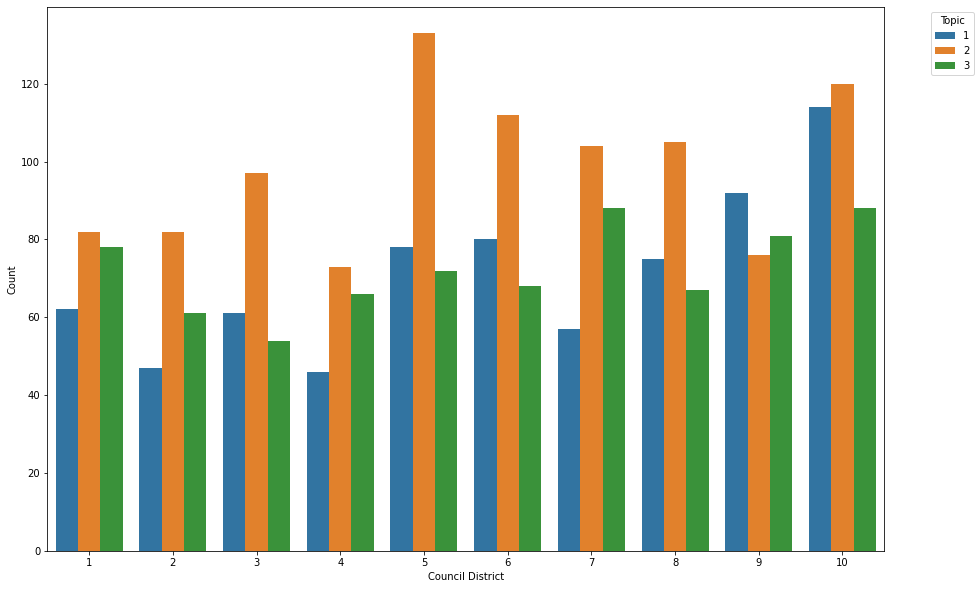

In [42]:
dft = sentiment_df.groupby('Council District')['Dominant_Topic'].value_counts().reset_index(name='Count')

# plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Council District', y='Count', data=dft, hue='Dominant_Topic')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Council District')
plt.show()


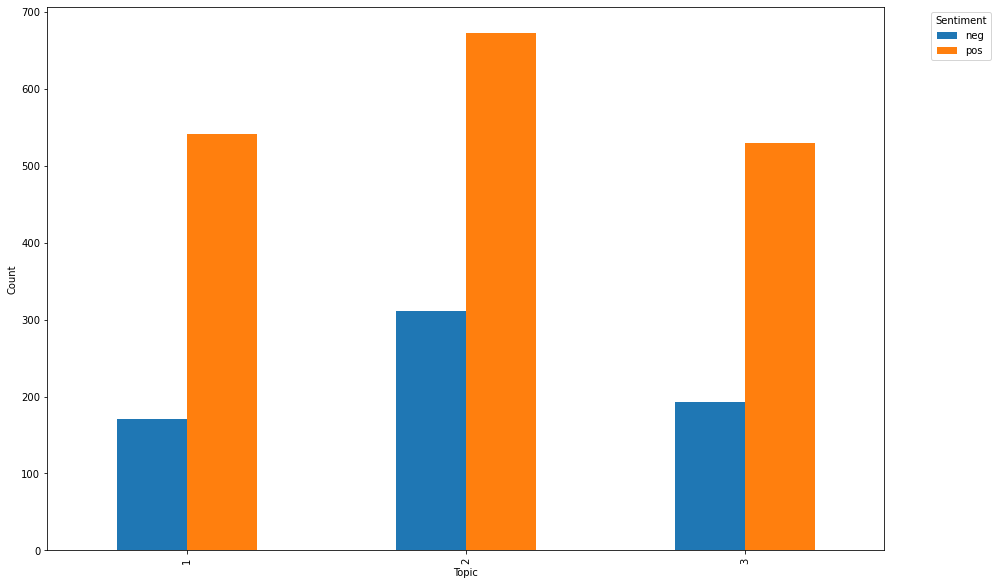

In [45]:
dfu = sentiment_df.groupby('Dominant_Topic')['comp_score'].value_counts().unstack()

# plot
dfu.plot.bar(figsize=(15, 10))
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()